In [1]:
import sys
sys.path.append("../")
from pathlib import Path
DIR = Path("/data1/xp/code/specEmbedding/score_distribution/pair")

import numpy as np
from ms2deepscore.models import load_model
from ms2deepscore import MS2DeepScore

from const import gnps
from utils import cosine_similarity

In [2]:
show_progress_bar = False
model_state_path = "./res/ms2deepscore_model.pt"

model = load_model(model_state_path)
ms2ds_model = MS2DeepScore(model, show_progress_bar)

In [3]:
spectra = np.load(gnps.ORBITRAP_TEST_QUERY, allow_pickle=True)

spectra_embedding = ms2ds_model.get_embedding_array(spectra)
cosine_scores = cosine_similarity(spectra_embedding, spectra_embedding)
mask = np.diag(np.ones((cosine_scores.shape[0]))).astype(bool)
mask = ~mask
cosine_scores = cosine_scores[mask]
np.save("/data1/xp/code/specEmbedding/score_distribution/tanimoto/MS2DeepScore.npy", cosine_scores.flatten())

1686it [00:03, 488.45it/s]


In [4]:
query_spectra = np.load(gnps.ORBITRAP_TEST_QUERY, allow_pickle=True)
ref_spectra = np.load(gnps.ORBITRAP_TEST_REF, allow_pickle=True)

query_smiles = np.array([
    s.get("smiles")
    for s in query_spectra
])
ref_smiles = np.array([
    s.get("smiles")
    for s in ref_spectra
])

query_embedding = ms2ds_model.get_embedding_array(query_spectra)
ref_embedding = ms2ds_model.get_embedding_array(ref_spectra)

cosine_scores = cosine_similarity(query_embedding, ref_embedding)
positive_indices = np.load(DIR / "positive_indices.npy", allow_pickle=True).item()
negative_indices = np.load(DIR / "negative_indices.npy", allow_pickle=True).item()

data = {
    "positive": cosine_scores[positive_indices["row"], positive_indices["col"]],
    "negative": cosine_scores[negative_indices["row"], negative_indices["col"]]
}

np.save(DIR / "MS2DeepScore.npy", data)

1686it [00:01, 1194.13it/s]
32436it [00:51, 626.43it/s] 


<Axes: ylabel='Density'>

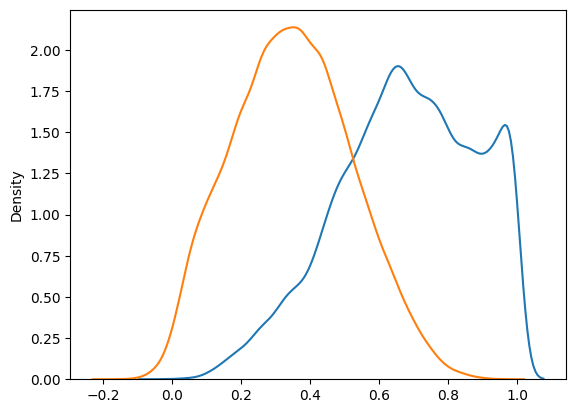

In [5]:
import seaborn as sns

sns.kdeplot(data["positive"])
sns.kdeplot(data["negative"])